## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_count = mouse_df["Mouse ID"].count()
mouse_count

1893

In [5]:
# Checking the distinct number of mice.
distinctmouse_count = mouse_df["Mouse ID"].nunique()
distinctmouse_count

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_df[mouse_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
allduplicate_mice = mouse_df[mouse_df.duplicated(['Mouse ID',])]
allduplicate_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [8]:
uniquemice_df = mouse_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
uniquemice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
uniquemice_count = uniquemice_df["Mouse ID"].count()
uniquemice_count

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_data = uniquemice_df[["Drug Regimen", "Tumor Volume (mm3)"]]
summary_data

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [11]:
grouped_data = summary_data.groupby(["Drug Regimen"])

summary_df = pd.DataFrame({
    "Mean": grouped_data["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    "Median": grouped_data["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    "Variance": grouped_data["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    "Standard Deviation": grouped_data["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    "SEM": grouped_data["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, & SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggdata = summary_data.groupby(["Drug Regimen"])
altsummary = aggdata.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
altsummary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

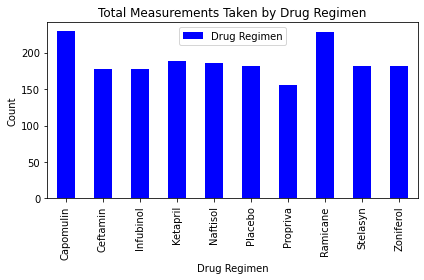

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Drug Regimen DF and count
regimen_group = uniquemice_df.groupby('Drug Regimen')
regimen_count = pd.DataFrame(regimen_group['Drug Regimen'].count())

# Bar Chart
bar_chart = regimen_count.plot(kind='bar', title="Total Measurements Taken by Drug Regimen", color="blue")

# Assign X and Y labels
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Count")
plt.tight_layout()

# Save chart
plt.savefig("Charts/BarChartPandas.png")

plt.show()


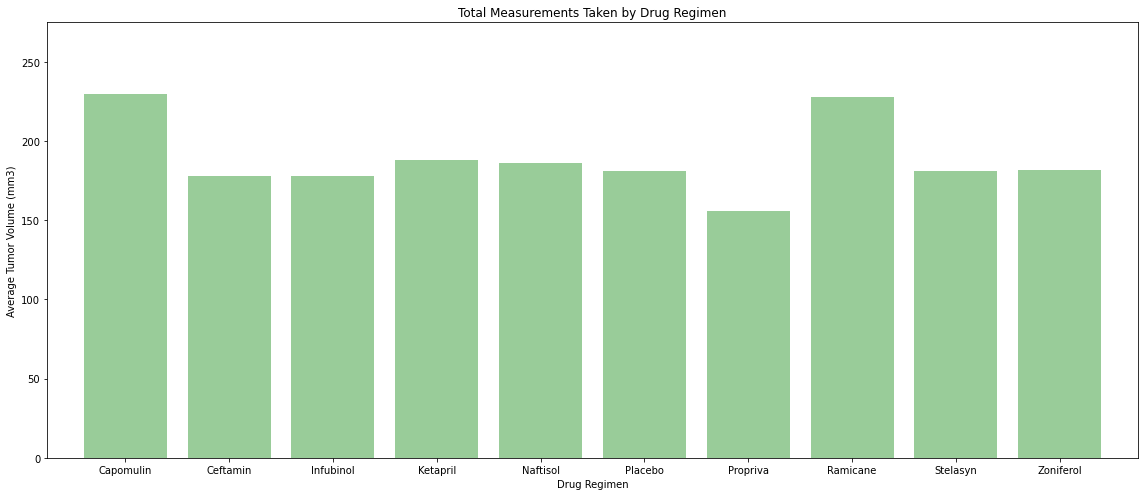

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# Set X Axis and Tick Mark Locations
X_Axis = np.arange(len(regimen_count))
tick_locations = [value for value in X_Axis]

# Set Size, Color,tick style
plt.figure(figsize=(16,7))
plt.bar(X_Axis, regimen_count['Drug Regimen'], color='green', alpha=0.4)
plt.xticks(tick_locations, list(regimen_count.index), rotation="0") 

# Set Limits
plt.xlim(-0.75, len(X_Axis) - 0.25)
plt.ylim(0, 275)

# Set Labels and Titles
plt.title("Total Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()

# Save chart
plt.savefig("Charts/BarChartPyplot.png")

plt.show()


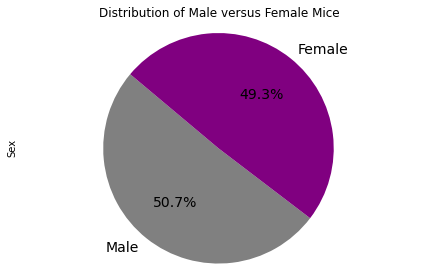

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = uniquemice_df.groupby('Sex')
# mice_gender.head()

mice_gender_count = pd.DataFrame(mice_gender["Sex"].count())
# mice_gender_count.head()

mice_gender_count = uniquemice_df["Sex"].value_counts()
plt.figure()
mice_gender_count.plot(kind="pie", autopct='%1.1f%%',shadow=False, startangle=140, fontsize=14, colors =["gray","purple"], legend =False)
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of Male versus Female Mice")
plt.tight_layout()
plt.savefig("Charts/PieChartPandas.png")
plt.show()

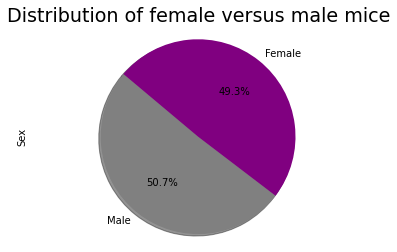

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Get Labels for our pie chart from the index values of the groupby dataframe

micegender = list(mice_gender_count.index.values)
# mice_genders = ["Female"],["Male"]

# # The values of each section of the pie chart
# mice_gender_counts = mice_gender_count["Sex"].count

# The colors of each section of the pie chart
colors = ["gray", "purple"]


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(mice_gender_count, labels=micegender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.savefig("Charts/PieChartPyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
